# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [6]:
#Type your code here
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import seaborn as sns
from sklearn.metrics import log_loss
from sklearn.model_selection import learning_curve

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [7]:
#Type your code here
df = pd.read_csv('clustered_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df

,TransactionType,Channel,CustomerAge,CustomerOccupation,AccountBalance,CustomerAge_bin,AccountBalance_bin,TransactionAmount_bin,cluster
0,Debit,ATM,70.0,Doctor,5112.21,4.0,4.0,4.0,2
1,Debit,ATM,68.0,Doctor,13758.91,4.0,4.0,4.0,2
2,Debit,Online,19.0,Student,1122.35,1.0,1.0,1.0,1
3,Debit,Online,26.0,Student,8569.06,1.0,1.0,1.0,1
4,Credit,Online,26.0,Student,7429.40,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...
2277,Credit,Branch,33.0,Doctor,12690.79,1.0,1.0,1.0,0
2278,Debit,Branch,48.0,Doctor,254.75,2.0,2.0,2.0,0
2279,Debit,Branch,56.0,Retired,3382.91,3.0,3.0,3.0,2
2280,Debit,Online,23.0,Student,1776.91,1.0,1.0,1.0,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [8]:
encoder_type = LabelEncoder()
encoder_channel = LabelEncoder()
encoder_occ = LabelEncoder()

df['TransactionType'] = encoder_type.fit_transform(df['TransactionType'])
df['Channel'] = encoder_channel.fit_transform(df['Channel'])
df['CustomerOccupation'] = encoder_occ.fit_transform(df['CustomerOccupation'])
df

,TransactionType,Channel,CustomerAge,CustomerOccupation,AccountBalance,CustomerAge_bin,AccountBalance_bin,TransactionAmount_bin,cluster
0,1,0,70.0,0,5112.21,4.0,4.0,4.0,2
1,1,0,68.0,0,13758.91,4.0,4.0,4.0,2
2,1,2,19.0,3,1122.35,1.0,1.0,1.0,1
3,1,2,26.0,3,8569.06,1.0,1.0,1.0,1
4,0,2,26.0,3,7429.40,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...
2277,0,1,33.0,0,12690.79,1.0,1.0,1.0,0
2278,1,1,48.0,0,254.75,2.0,2.0,2.0,0
2279,1,1,56.0,2,3382.91,3.0,3.0,3.0,2
2280,1,2,23.0,3,1776.91,1.0,1.0,1.0,1


In [9]:
#Type your code here
x = df.drop(['cluster'], axis=1)
y = df['cluster']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42 ,stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

In [10]:
#Type your code here
model = XGBClassifier(
    n_estimators=15,
    max_depth=1,
    learning_rate=0.001,
    random_state=42,
    objective='multi:softmax',
    eval_metric='mlogloss'
)

Untuk dataset seperti ini, XGBoost Classifier adalah pilihan yang tepat karena mampu menangani data tabular dengan kombinasi fitur kategorikal dan numerik secara efisien. Dataset yang Anda miliki dapat mencakup fitur kategorikal seperti TransactionType, Channel, dan CustomerOccupation, serta fitur numerik seperti CustomerAge dan AccountBalance.  XGBoost secara alami dapat menangani jenis data ini, terutama setelah encoding yang tepat.

 Selain itu, XGBoost adalah algoritma yang memiliki kemampuan untuk menangkap pola yang rumit melalui pohon keputusan yang ditingkatkan.  Hubungan non-linear mungkin sulit ditangkap oleh model linear biasa karena dataset ini juga memiliki variabel binned seperti CustomerAge_bin, AccountBalance_bin, dan TransactionAmount_bin.  XGBoost adalah pilihan yang bagus untuk tugas klasifikasi karena kemampuan mendeteksi pola seperti ini.




## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [11]:
#Type your code here
model = XGBClassifier(
    n_estimators=15,
    max_depth=1,
    learning_rate=0.001,
    random_state=42,
    objective='multi:softmax',
    eval_metric='mlogloss'
)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8774617067833698


In [12]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       112
           1       1.00      0.96      0.98       124
           2       0.76      1.00      0.86       152
           3       0.72      0.30      0.43        69

    accuracy                           0.88       457
   macro avg       0.87      0.81      0.81       457
weighted avg       0.88      0.88      0.86       457



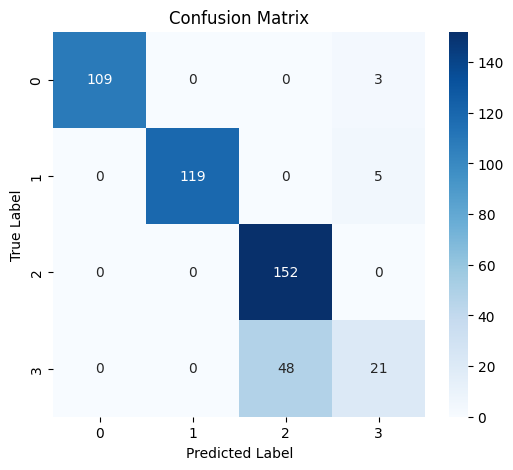

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Berdasarkan hasil evaluasi dari confusion matrix, f1 score, dan accuracy, hasil yang diperoleh sangat baik.

Terdapat hasil :
- accuracy = 87%
- recall = 97% untuk kelas 0, 96% untuk kelas 1, 100% untuk kelas 2, dan 30% untuk kelas 3.
- precision = 100% untuk kelas 0, 100% untuk kelas 1, 76% untuk kelas 2, dan 72% unutk kelas 3
-f1 score = 99% unutk kelas 0, 98% untuk kelas 1, 86% untuk kelas 2, dan 43% untuk kelas 3.

kesimpulan yang dapat ditarik adalah model memiliki accuracy yang tinggi, tetapi kinerja pada kelas 3 masih buruk

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [14]:
#Type your code here
param_grid = {
    'n_estimators': [10,20],
    'max_depth': [1,2],
    'learning_rate': [0.01, 0.001],
    'subsample': [0.6, 0.7, 0.8],
}

In [15]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='weighted'),
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(x_train, y_train)


print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 10, 'subsample': 0.6}


Berdasarkan GridCV yang menggunakan grid parameter seperti diatas, diperoleh hyperparameter paling optimal :
- 'learning_rate': 0.01,
- 'max_depth': 2,
- 'n_estimators': 10,
- 'subsample': 0.6

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [16]:
#Type your code here
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [17]:
class_report_tune = classification_report(y_test, y_pred)
print(class_report_tune)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       112
           1       1.00      0.96      0.98       124
           2       1.00      1.00      1.00       152
           3       1.00      1.00      1.00        69

    accuracy                           0.99       457
   macro avg       0.99      0.99      0.99       457
weighted avg       0.99      0.99      0.99       457



Dapat diperhatikan bahwa recall dan precision dan f-1 score pada model tersebut sangat tinggi dimana, kelas 0 dan 1 memiliki recall dan precision tinggi dan kelas 2 dan 3 memiliki metrik sempurna

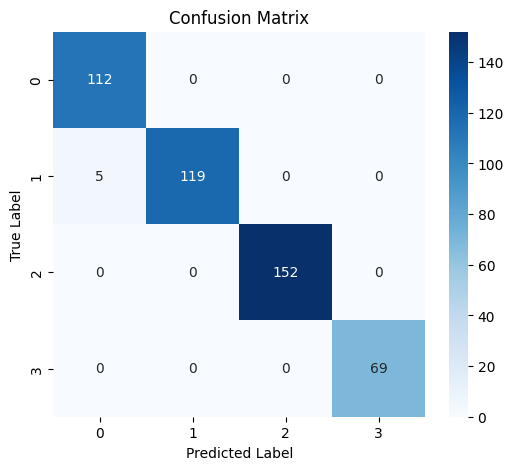

In [18]:
conf_matrix_tune = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_tune, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Confusion matrix di atas menunjukkan bahwa model klasifikasi bekerja dengan sangat baik, dengan tingkat kesalahan yang sangat rendah. Hasil ini mencerminkan akurasi model yang sangat tinggi, dengan kesalahan yang hanya terjadi pada satu kelas tertentu. Kemungkinan besar, fitur dari kelas 1 memiliki kemiripan dengan kelas 0, sehingga menyebabkan model kesulitan dalam membedakannya. Hanya  terdapat 5 sampel dari kelas 1 yang salah diklasifikasikan sebagai kelas 0, sementara semua sampel lainnya diklasifikasikan dengan benar.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [19]:
#overfit underfit
train_acc = best_model.score(x_train, y_train)
test_acc = best_model.score(x_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9918
Test Accuracy: 0.9891


Dapat diperhatikan bahwa acc pada traning dan testing mirip, dimana jika training tinggi dan testing rendah terjadi overfit, jika kedua rendah terjadi underfit.

In [20]:
train_loss = log_loss(y_train, best_model.predict_proba(x_train))
test_loss = log_loss(y_test, best_model.predict_proba(x_test))

print(f"Training Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Training Loss: 1.2182
Test Loss: 1.2190


loss training dan testing juga hampir sama, dimana jika training loss << testing maka merupakan overfit dan jika kedua tinggi maka underfit.

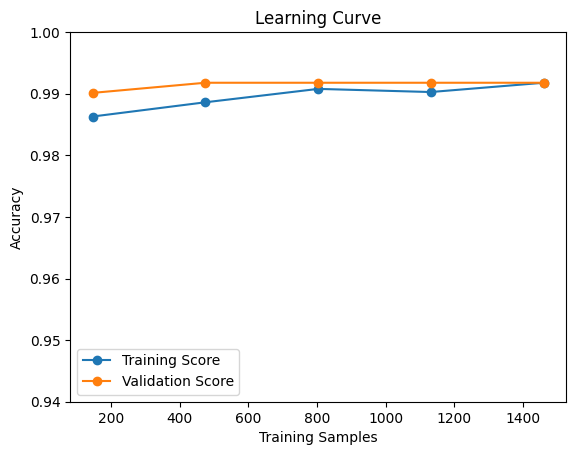

In [21]:
train_sizes, train_scores, test_scores = learning_curve(
    best_model, x_train, y_train, cv=5, scoring="accuracy"
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Score")

plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.ylim(0.94, 1.0)
plt.legend()
plt.title("Learning Curve")
plt.show()

Dapat diperhatikan bahwa tidak terjadi overfit karena training score dan validasi juga mendeketi.

In [23]:
print("Classification Report Before Tuning:")
print(class_report)

print("\nClassification Report After Tuning:")
print(class_report_tune)

Classification Report Before Tuning:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       112
           1       1.00      0.96      0.98       124
           2       0.76      1.00      0.86       152
           3       0.72      0.30      0.43        69

    accuracy                           0.88       457
   macro avg       0.87      0.81      0.81       457
weighted avg       0.88      0.88      0.86       457


Classification Report After Tuning:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       112
           1       1.00      0.96      0.98       124
           2       1.00      1.00      1.00       152
           3       1.00      1.00      1.00        69

    accuracy                           0.99       457
   macro avg       0.99      0.99      0.99       457
weighted avg       0.99      0.99      0.99       457



Dapat diperhatikan terdapat kenaikan sangat baik dengan menggunakan hyperparameter optimal dari GridCV.

Dapat disimpulkan bahwa tuning hyperparameter pada model tersebut memiliki hasil yang sangat baik.

Rekomendasi untuk dilakukan :
- pencobaan dengan model lain, mungkin berbasis neural net atau SVM
- save hasil training model dan deploy

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.